In [1]:
import numpy as np
import itertools as iters
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import scipy

In [9]:
%run metro_generic.py

## i.i.d. Gaussians

In [10]:
np.random.seed(190)

In [11]:
def lf(x):
    temp = 0
    for x1 in x:
        temp += -.5 * (x1**2)
    return temp

In [12]:
p = 3
active_frontier = [[], [], []]

In [13]:
x = np.random.normal(size = p)
x

array([0.70969145, 1.36779171, 1.29870504])

In [14]:
lf(x)

-2.0305754539333747

In [15]:
xk = ordered_metro(lf, x, active_frontier)
x == xk

array([False, False,  True])

In [16]:
np.random.seed(190)

n_rep = 5000
res = np.zeros((n_rep, 6))
for i in range(n_rep):
    x = np.random.normal(size = p)
    xk = ordered_metro(lf, x, active_frontier)
    res[i, :] = np.concatenate((x, xk))

In [17]:
np.mean(res[:,0] == res[:, 3])

0.3084

In [18]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([ 0.57202417,  1.54799246, -1.27104662, -0.68993997,  0.8604003 ,
       -0.52899724])

In [19]:
np.cov(res, rowvar = False)

array([[ 0.95491956,  0.00414675, -0.00615067,  0.74938853, -0.0016527 ,
         0.01568412],
       [ 0.00414675,  1.01016961, -0.01199383, -0.00979642,  0.79218702,
        -0.01425009],
       [-0.00615067, -0.01199383,  1.02268532,  0.0029078 , -0.01546218,
         0.79937337],
       [ 0.74938853, -0.00979642,  0.0029078 ,  0.9886931 , -0.01093582,
         0.01335354],
       [-0.0016527 ,  0.79218702, -0.01546218, -0.01093582,  0.98691214,
        -0.03005825],
       [ 0.01568412, -0.01425009,  0.79937337,  0.01335354, -0.03005825,
         1.00294489]])

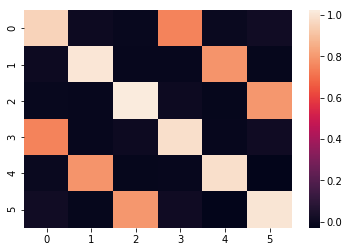

In [20]:
sns.heatmap(np.cov(res, rowvar = False))

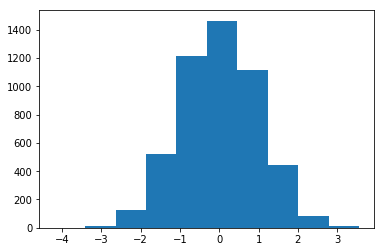

In [21]:
plt.hist(res[:,4])
plt.show()

## 2 correlated gaussians

In [22]:
%run metro_generic.py

In [23]:
np.random.seed(190)

In [24]:
rho = .5

def lf(x, rho = .5):
    return (x[0]**2 + x[1]**2 - x[0] * x[1] * 2 * rho) * -.5 / (1 - rho**2)
    

In [25]:
def sim_x():
    z = np.random.normal(size = 3)
    x = np.zeros(2)
    x[0] = np.sqrt(rho) * z[0] + np.sqrt(1 - rho) * z[1]
    x[1] = np.sqrt(rho) * z[0] + np.sqrt(1 - rho) * z[2]
    return(x)

x = sim_x()
x

array([1.46900243, 1.42015078])

In [26]:
active_frontier = [[1], []]

In [27]:
np.random.seed(55)
x
xk = ordered_metro(lf, x, active_frontier)
print(xk)
print(x)

[-0.15472868  1.31836685]
[1.46900243 1.42015078]


In [28]:
np.arange(10)[tuple([])]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
np.random.seed(9999)
n_rep = 10000
res = np.zeros((n_rep, 4))
for i in range(n_rep):
    x = sim_x()
    xk = ordered_metro(lf, x, active_frontier)
    res[i, :] = np.concatenate((x, xk))

In [30]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([ 0.65636832, -0.25480698,  0.92121692,  0.17868988])

In [31]:
np.cov(res, rowvar = False)

array([[1.01806668, 0.51440604, 0.82107328, 0.51654636],
       [0.51440604, 1.01727397, 0.51271284, 0.83327048],
       [0.82107328, 0.51271284, 1.01832064, 0.50966193],
       [0.51654636, 0.83327048, 0.50966193, 1.00252727]])

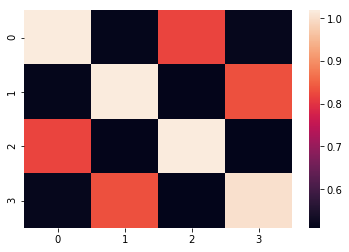

In [32]:
sns.heatmap(np.cov(res, rowvar = False))

In [33]:
np.mean(res[:,0] == res[:,2])

0.3381

In [34]:
np.mean(res[:,1] == res[:,3])

0.3557

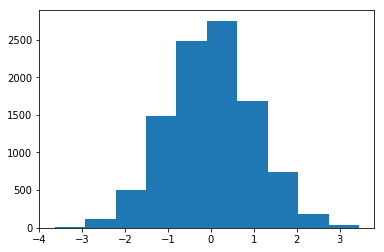

In [35]:
plt.hist(res[:,3])
plt.show()

## 3 correlated gaussians

In [36]:
%run metro_generic.py

In [37]:
rho = .5
d = 3
sigma = np.zeros((d,d))
for i,j in itertools.product(range(d), range(d)):
    sigma[i, j] = rho
    if(i == j):
        sigma[i, j] = 1

sigma_inv = np.linalg.inv(sigma)
sigma_half = scipy.linalg.sqrtm(sigma)

print(sigma)

def lf(x, rho = .5):
    return -.5 * x.dot(sigma_inv.dot(x))

def sim_x():
    z = np.random.normal(size = d)
    return sigma_half.dot(z)

[[1.  0.5 0.5]
 [0.5 1.  0.5]
 [0.5 0.5 1. ]]


In [38]:
active_frontier = [[1,2], [2], []]

In [39]:
np.random.seed(100)
x = sim_x()
x

array([-1.29715102,  0.18243165,  0.75543945])

In [40]:
np.random.seed(515)
x = sim_x()
xk = ordered_metro(lf, x, active_frontier)
print(xk)
print(x)

[3.10991736 0.56694878 0.51661027]
[3.10991736 0.56694878 1.58921416]


In [41]:
np.random.seed(100)
n_rep = 10000
res = np.zeros((n_rep, 2*d))
for i in range(n_rep):
    x = sim_x()
    xk = ordered_metro(lf, x, active_frontier)
    res[i, :] = np.concatenate((x, xk))

In [42]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([ 1.10772094, -0.47184728,  0.56310477,  0.70464069, -0.56633866,
        0.68065433])

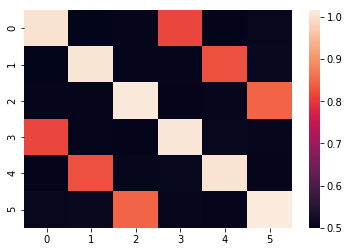

In [43]:
sns.heatmap(np.cov(res, rowvar = False))

In [44]:
emp_cov = np.cov(res, rowvar = False)

orig_marg = np.abs(sigma - emp_cov[0:d, 0:d])
print(np.max(orig_marg))
ko_marg = np.abs(sigma - emp_cov[d:(2*d), d:(2*d)])
print(np.max(ko_marg))

np.fill_diagonal(orig_marg, 0)
print(np.max(orig_marg))
ko_orig_cross = np.abs(sigma - emp_cov[0:d, d:(2*d)])
np.fill_diagonal(ko_orig_cross, 0)
print(np.max(ko_orig_cross))

0.012691351047368293
0.015467898232858879
0.005124594845620334
0.011772398529287131


In [45]:
np.mean(res[:,0] == res[:,d])

0.3485

In [46]:
np.mean(res[:,1] == res[:,d+1])

0.3645

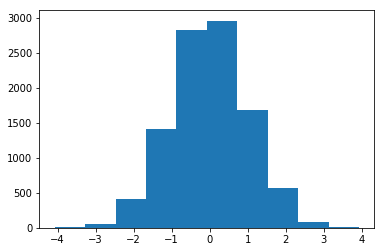

In [47]:
plt.hist(res[:, 5])
plt.show()

## Large Gaussian Clique

In [48]:
%run metro_generic.py

In [49]:
rho = .3
d = 5
sigma = np.zeros((d,d))
for i,j in itertools.product(range(d), range(d)):
    sigma[i, j] = rho
    if(i == j):
        sigma[i, j] = 1

sigma_inv = np.linalg.inv(sigma)
sigma_half = scipy.linalg.sqrtm(sigma)

print(sigma)

def lf(x, rho = .5):
    return -.5 * x.dot(sigma_inv.dot(x))

def sim_x():
    z = np.random.normal(size = d)
    return sigma_half.dot(z)

[[1.  0.3 0.3 0.3 0.3]
 [0.3 1.  0.3 0.3 0.3]
 [0.3 0.3 1.  0.3 0.3]
 [0.3 0.3 0.3 1.  0.3]
 [0.3 0.3 0.3 0.3 1. ]]


In [50]:
active_frontier = [[1,2,3,4], [2,3,4], [3,4], [4], []]

In [51]:
np.random.seed(100)
x = sim_x()
x

array([-1.40255503,  0.34811079,  1.02610276, -0.14979935,  0.88243567])

In [52]:
np.random.seed(515)
x = sim_x()
xk = ordered_metro(lf, x, active_frontier)
print(xk)
print(x)

[3.18004091 1.10776083 1.38072062 0.86284381 0.36507574]
[3.18004091 0.17115991 1.38072062 1.08323378 0.36507574]


In [53]:
%%time

np.random.seed(100)
n_rep = 10000
res = np.zeros((n_rep, 2*d))
for i in range(n_rep):
    x = sim_x()
    xk = ordered_metro(lf, x, active_frontier)
    res[i, :] = np.concatenate((x, xk))

CPU times: user 12.5 s, sys: 105 ms, total: 12.6 s
Wall time: 12.9 s


In [54]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([-0.02909027, -0.03570441, -0.67132255,  0.29312345, -0.04837758,
        0.50876574,  0.86645959,  0.0066358 ,  0.0153707 , -0.61579643])

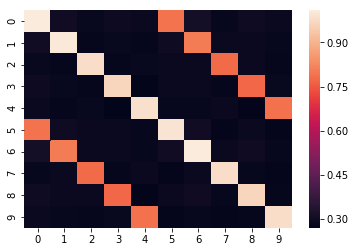

In [55]:
sns.heatmap(np.cov(res, rowvar = False))

In [56]:
emp_cov = np.cov(res, rowvar = False)

orig_marg = np.abs(sigma - emp_cov[0:d, 0:d])
print(np.max(orig_marg))
ko_marg = np.abs(sigma - emp_cov[d:(2*d), d:(2*d)])
print(np.max(ko_marg))

np.fill_diagonal(orig_marg, 0)
print(np.max(orig_marg))
ko_orig_cross = np.abs(sigma - emp_cov[0:d, d:(2*d)])
np.fill_diagonal(ko_orig_cross, 0)
print(np.max(ko_orig_cross))

0.03470131845750757
0.0319543311043925
0.029576941240963883
0.02609572593223497


In [57]:
np.mean(res[:,0] == res[:,d])

0.3252

In [58]:
np.mean(res[:,1] == res[:,d+1])

0.3335

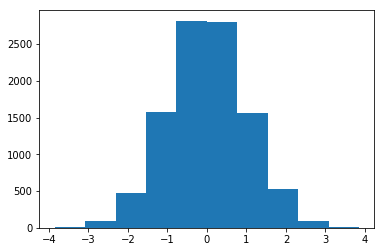

In [59]:
plt.hist(res[:, 5])
plt.show()

## Gaussian Markov Chain

In [53]:
%run metro_generic.py

In [54]:
rho = .5
d = 4
sigma = np.zeros((d,d))
for i,j in itertools.product(range(d), range(d)):
    sigma[i, j] = rho**(np.abs(i - j))

sigma_inv = np.linalg.inv(sigma)
sigma_half = scipy.linalg.sqrtm(sigma)

print(sigma)

def lf(x, rho = .5):
    return -.5 * x.dot(sigma_inv.dot(x))

def sim_x():
    z = np.random.normal(size = d)
    return sigma_half.dot(z)

[[1.    0.5   0.25  0.125]
 [0.5   1.    0.5   0.25 ]
 [0.25  0.5   1.    0.5  ]
 [0.125 0.25  0.5   1.   ]]


In [55]:
active_frontier = [[j + 1] for j in range(d)]
active_frontier[d-1] = []
active_frontier

[[1], [2], [3], []]

In [56]:
np.random.seed(100)
x = sim_x()
x

array([-1.5003346 ,  0.13875919,  0.92998418,  0.00656004])

In [57]:
np.random.seed(515)
x = sim_x()
xk = ordered_metro(lf, x, active_frontier)
print(xk)
print(x)

[2.84370014 2.11147166 0.14048914 1.41039051]
[3.05136677 0.68409852 1.29290178 0.96365204]


In [58]:
np.random.seed(100)
n_rep = 10000
res = np.zeros((n_rep, 2*d))
for i in range(n_rep):
    x = sim_x()
    xk = ordered_metro(lf, x, active_frontier)
    res[i, :] = np.concatenate((x, xk))

In [59]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([0.8218362 , 0.22890076, 0.267969  , 0.67086444, 0.63602988,
       0.4171855 , 1.82580994, 2.00526053])

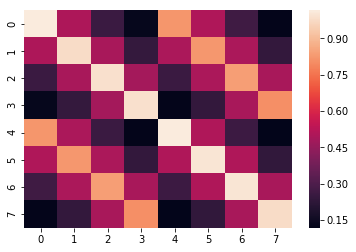

In [60]:
sns.heatmap(np.cov(res, rowvar = False))

In [61]:
emp_cov = np.cov(res, rowvar = False)

orig_marg = np.abs(sigma - emp_cov[0:d, 0:d])
print(np.max(orig_marg))
ko_marg = np.abs(sigma - emp_cov[d:(2*d), d:(2*d)])
print(np.max(ko_marg))

np.fill_diagonal(orig_marg, 0)
print(np.max(orig_marg))
ko_orig_cross = np.abs(sigma - emp_cov[0:d, d:(2*d)])
np.fill_diagonal(ko_orig_cross, 0)
print(np.max(ko_orig_cross))

0.021139092573349005
0.020989273859521762
0.014486332692702442
0.017573726335996354


In [62]:
np.mean(res[:,0] == res[:,d])

0.3403

In [63]:
np.mean(res[:,1] == res[:,d+1])

0.3895

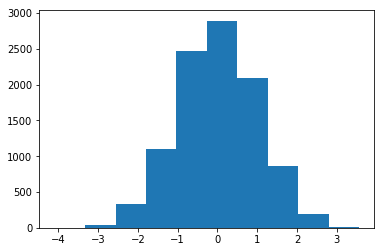

In [64]:
plt.hist(res[:, 5])
plt.show()

## Ising Model

#### 2 x 2

In [15]:
%run metro_generic.py

In [16]:
dims = (2,2)
d = dims[0] * dims[1]
beta_0 = .1

def lf(x, beta = beta_0):
    #Ising model density

    temp = 0
    for j in range(d) :
        if j % dims[0] > 0:
            temp += x[j] * x[j - 1]
        if j % dims[0] < dims[0] - 1:
            temp += x[j] * x[j + 1]
        if j - dims[0] >= 0:
            temp += x[j] * x[j - dims[0]]
        if j + dims[0] < d:
            temp += x[j] * x[j + dims[0]]
     
    return beta * temp  / 2

def ising_sampler(lf, dims, beta = beta_0, n_iter = 500):
    d = dims[0] * dims[1]
    x = np.random.binomial(1, .5, size = d) * 2 - 1
    for _ in range(n_iter):
        j = np.random.choice(d)
        x0 = x.copy()
        x0[j] = -1
        x1 = x.copy()
        x1[j] = 1
        p0 = np.exp(lf(x0, beta))
        p1 = np.exp(lf(x1, beta))
        u = np.random.binomial(1, p0 / (p1 + p0))
        if u == 1:
            x = x0
        else:
            x = x1
    
    return x

In [17]:
active_frontier = []
for j in range(d):
    active_frontier += [[j2 for j2 in range(j+1, min(d, j+1+dims[0]))]]
active_frontier

[[1, 2], [2, 3], [3], []]

In [18]:
def flip_prop(j, xj):
    return -1*xj

def random_prop(j, xj):
    return np.random.binomial(1, .5) * 2 - 1

In [19]:
np.random.seed(101)
x = ising_sampler(lf, dims)
print(x)
xk = ordered_metro(lf, x, active_frontier, flip_prop)
print(xk)

[-1 -1  1 -1]
variable: 0
variable: 1
variable: 2
variable: 3
[ 1 -1  1 -1]


In [20]:
%%time

beta = 0

np.random.seed(99999)
n_rep = 5000
res = np.zeros((n_rep, 2*d))
for i in range(n_rep):
    x = ising_sampler(lf, dims, n_iter = 200)
    xk = ordered_metro(lf, x, active_frontier, random_prop, gamma = .99)
    res[i, :] = np.concatenate((x, xk))
    
emp_cov = np.cov(res, rowvar = False)

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
variable: 3
variable: 0
variable: 1
variable: 2
vari

KeyboardInterrupt: 

In [21]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([-0.87681241, -0.42426407, -0.11313708,  0.76367532,  0.31112698,
        0.65053824,  0.16970563,  0.73539105])

In [22]:
i = 1
print(res[i, 1:d])
print(res[i, d:(2*d)])

[-1.  1. -1.]
[-1.  1.  1.  1.]


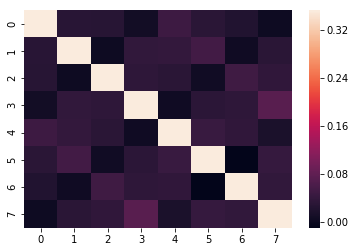

In [23]:
sns.heatmap(np.cov(res, rowvar = False))

In [24]:
%%time

np.random.seed(100)
n_rep = 5000
res = np.zeros((n_rep, d))
for i in range(n_rep):
    res[i, :] = ising_sampler(lf, dims, n_iter = 200)
    
ho_cov = np.cov(res, rowvar = False)
ho_cov

CPU times: user 37.8 s, sys: 45.3 ms, total: 37.9 s
Wall time: 38 s


array([[0.99989022, 0.09231286, 0.09333963, 0.01283201],
       [0.09231286, 1.00016403, 0.00777916, 0.09056451],
       [0.09333963, 0.00777916, 0.9993237 , 0.08289434],
       [0.01283201, 0.09056451, 0.08289434, 0.99960456]])

In [25]:
orig_marg = emp_cov[0:d, 0:d]
print(np.max(np.abs(orig_marg - ho_cov)))
ko_marg = emp_cov[d:(2*d), d:(2*d)]
print(np.max(np.abs(ko_marg - ho_cov)))

ko_orig_cross = emp_cov[0:d, d:(2*d)] - ho_cov
np.fill_diagonal(ko_orig_cross, 0)
print(np.max(np.abs(ko_orig_cross)))

NameError: name 'emp_cov' is not defined

In [ ]:
ho_cov

In [ ]:
orig_marg

In [ ]:
ko_marg

### 3 x 3

In [79]:
%run metro_generic.py

In [80]:
dims = (3,3)
d = dims[0] * dims[1]
beta_0 = .1

def lf(x, beta = beta_0):
    #Ising model density

    temp = 0
    for j in range(d) :
        if j % dims[0] > 0:
            temp += x[j] * x[j - 1]
        if j % dims[0] < dims[0] - 1:
            temp += x[j] * x[j + 1]
        if j - dims[0] >= 0:
            temp += x[j] * x[j - dims[0]]
        if j + dims[0] < d:
            temp += x[j] * x[j + dims[0]]
     
    return beta * temp  / 2

def ising_sampler(lf, dims, beta = beta_0, n_iter = 500):
    d = dims[0] * dims[1]
    x = np.random.binomial(1, .5, size = d) * 2 - 1
    for _ in range(n_iter):
        j = np.random.choice(d)
        x0 = x.copy()
        x0[j] = -1
        x1 = x.copy()
        x1[j] = 1
        p0 = np.exp(lf(x0, beta))
        p1 = np.exp(lf(x1, beta))
        u = np.random.binomial(1, p0 / (p1 + p0))
        if u == 1:
            x = x0
        else:
            x = x1
    
    return x

In [81]:
active_frontier = []
for j in range(d):
    active_frontier += [[j2 for j2 in range(j+1, min(d, j+1+dims[0]))]]
active_frontier

[[1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8],
 [8],
 []]

In [82]:
def flip_prop(j, xj):
    return -1*xj

def random_prop(j, xj):
    return np.random.binomial(1, .5) * 2 - 1

In [83]:
np.random.seed(101)
x = ising_sampler(lf, dims)
print(x)
xk = ordered_metro(lf, x, active_frontier, flip_prop)
print(xk)

[-1  1  1  1  1 -1 -1  1 -1]
[ 1  1  1 -1 -1  1  1 -1  1]


In [84]:
%%time

beta = 0

np.random.seed(999)
n_rep = 5000
res = np.zeros((n_rep, 2*d))
for i in range(n_rep):
    x = ising_sampler(lf, dims, n_iter = 200)
    xk = ordered_metro(lf, x, active_frontier, random_prop, gamma = .8)
    res[i, :] = np.concatenate((x, xk))
    
emp_cov = np.cov(res, rowvar = False)

CPU times: user 1min 15s, sys: 361 ms, total: 1min 16s
Wall time: 1min 17s


In [85]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([ 1.10308658,  0.3959798 ,  1.41421356,  0.14142136,  0.1979899 ,
        1.52735065,  1.38592929,  0.1979899 ,  2.20617316,  0.16970563,
        0.96166522,  0.98994949,  1.24450793, -0.90509668, -0.1979899 ,
        0.70710678, -1.41421356,  1.49906638])

In [86]:
i = 1
print(res[i, 1:d])
print(res[i, d:(2*d)])

[-1.  1. -1. -1. -1.  1. -1.  1.]
[ 1.  1.  1. -1. -1. -1.  1. -1.  1.]


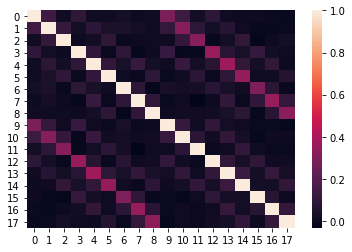

In [87]:
sns.heatmap(np.cov(res, rowvar = False))

In [88]:
%%time

np.random.seed(100)
n_rep = 5000
res = np.zeros((n_rep, d))
for i in range(n_rep):
    res[i, :] = ising_sampler(lf, dims, n_iter = 200)
    
ho_cov = np.cov(res, rowvar = False)
ho_cov

CPU times: user 57.5 s, sys: 309 ms, total: 57.8 s
Wall time: 59.6 s


In [89]:
orig_marg = emp_cov[0:d, 0:d]
print(np.max(np.abs(orig_marg - ho_cov)))
ko_marg = emp_cov[d:(2*d), d:(2*d)]
print(np.max(np.abs(ko_marg - ho_cov)))

ko_orig_cross = emp_cov[0:d, d:(2*d)] - ho_cov
np.fill_diagonal(ko_orig_cross, 0)
print(np.max(np.abs(ko_orig_cross)))

0.05410970194038799
0.04948477695539098
0.050440648129625794


In [90]:
ho_cov

array([[ 0.99986141,  0.10819828,  0.01344077,  0.10796751,  0.0321978 ,
         0.00567473,  0.01691634,  0.00862509, -0.02147662],
       [ 0.10819828,  1.00010786,  0.13691186,  0.02742501,  0.11352286,
         0.02316623,  0.00935163,  0.0336989 , -0.01226037],
       [ 0.01344077,  0.13691186,  1.00012258,  0.00296603,  0.0328981 ,
         0.09445409,  0.00586389,  0.00871726, -0.01013227],
       [ 0.10796751,  0.02742501,  0.00296603,  0.99984653,  0.07621972,
         0.01552791,  0.10271382,  0.0205846 ,  0.00347894],
       [ 0.0321978 ,  0.11352286,  0.0328981 ,  0.07621972,  1.00009186,
         0.09677776,  0.00216267,  0.11852354,  0.00455483],
       [ 0.00567473,  0.02316623,  0.09445409,  0.01552791,  0.09677776,
         1.00018404,  0.01086457,  0.04884817,  0.1164825 ],
       [ 0.01691634,  0.00935163,  0.00586389,  0.10271382,  0.00216267,
         0.01086457,  0.99995663,  0.11787381,  0.01097131],
       [ 0.00862509,  0.0336989 ,  0.00871726,  0.0205846 ,  0

In [91]:
orig_marg

array([[ 0.99995663,  0.14034071,  0.0144909 ,  0.09518784,  0.00635759,
         0.00806465,  0.02049834,  0.00235679,  0.01431614],
       [ 0.14034071,  1.00016867,  0.11031006,  0.01879256,  0.088402  ,
         0.04148734,  0.0442991 ,  0.02598952,  0.00542637],
       [ 0.0144909 ,  0.11031006,  0.99979996,  0.00276055,  0.01714743,
         0.09558712, -0.0039928 ,  0.00354471,  0.00737748],
       [ 0.09518784,  0.01879256,  0.00276055,  1.00019604,  0.09681376,
        -0.00284377,  0.0919792 , -0.012008  ,  0.00353831],
       [ 0.00635759,  0.088402  ,  0.01714743,  0.09681376,  1.0001922 ,
         0.10436039,  0.03275167,  0.11601536,  0.02111686],
       [ 0.00806465,  0.04148734,  0.09558712, -0.00284377,  0.10436039,
         0.99973339,  0.00797824, -0.00526153,  0.08894387],
       [ 0.02049834,  0.0442991 , -0.0039928 ,  0.0919792 ,  0.03275167,
         0.00797824,  0.9998158 ,  0.09196351, -0.01781508],
       [ 0.00235679,  0.02598952,  0.00354471, -0.012008  ,  0

In [92]:
ko_marg

array([[ 1.00019428e+00,  1.19991358e-01,  4.36727345e-03,
         1.03178396e-01,  1.92345669e-02,  1.00087217e-02,
        -5.22504501e-03, -7.52150430e-04, -1.48538508e-02],
       [ 1.19991358e-01,  1.00001504e+00,  8.74270854e-02,
         1.33633127e-02,  1.04194919e-01,  2.52431286e-02,
        -1.25385077e-02,  9.07381476e-03,  6.51298260e-03],
       [ 4.36727345e-03,  8.74270854e-02,  1.00000400e+00,
        -2.24684937e-03,  8.58091618e-03,  1.04860172e-01,
         6.26125225e-03, -5.72114423e-03, -5.09781956e-03],
       [ 1.03178396e-01,  1.33633127e-02, -2.24684937e-03,
         9.99890218e-01,  1.03445969e-01,  3.24557712e-02,
         9.38427686e-02,  1.15543109e-02,  1.60300860e-02],
       [ 1.92345669e-02,  1.04194919e-01,  8.58091618e-03,
         1.03445969e-01,  1.00003617e+00,  1.28389838e-01,
         2.69333867e-02,  1.10166033e-01,  3.18777355e-02],
       [ 1.00087217e-02,  2.52431286e-02,  1.04860172e-01,
         3.24557712e-02,  1.28389838e-01,  1.000192

#### 3 x 3

In [123]:
%run metro_generic.py

In [124]:
dims = (3,3)
d = dims[0] * dims[1]
beta_0 = .3

def lf(x, beta = beta_0):
    #Ising model density

    temp = 0
    for j in range(d) :
        if j % dims[0] > 0:
            temp += x[j] * x[j - 1]
        if j % dims[0] < dims[0] - 1:
            temp += x[j] * x[j + 1]
        if j - dims[0] >= 0:
            temp += x[j] * x[j - dims[0]]
        if j + dims[0] < d:
            temp += x[j] * x[j + dims[0]]
     
    return beta * temp  / 2

def ising_sampler(lf, dims, beta = beta_0, n_iter = 500):
    d = dims[0] * dims[1]
    x = np.random.binomial(1, .5, size = d) * 2 - 1
    for _ in range(n_iter):
        j = np.random.choice(d)
        x0 = x.copy()
        x0[j] = -1
        x1 = x.copy()
        x1[j] = 1
        p0 = np.exp(lf(x0, beta))
        p1 = np.exp(lf(x1, beta))
        u = np.random.binomial(1, p0 / (p1 + p0))
        if u == 1:
            x = x0
        else:
            x = x1
    
    return x

In [125]:
active_frontier = []
for j in range(d):
    active_frontier += [[j2 for j2 in range(j+1, min(d, j+1+dims[0]))]]
active_frontier

[[1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8],
 [8],
 []]

In [126]:
def flip_prop(j, xj):
    return -1*xj

def random_prop(j, xj):
    return np.random.binomial(1, .5) * 2 - 1

In [127]:
np.random.seed(101)
x = ising_sampler(lf, dims)
print(x)
xk = ordered_metro(lf, x, active_frontier, flip_prop)
print(xk)

[ 1  1  1  1  1 -1  1  1 -1]
[-1  1  1 -1 -1 -1  1  1  1]


In [128]:
%%time

beta = 0

np.random.seed(999)
n_rep = 5000
res = np.zeros((n_rep, 2*d))
for i in range(n_rep):
    x = ising_sampler(lf, dims, n_iter = 200)
    xk = ordered_metro(lf, x, active_frontier, random_prop, gamma = .99)
    res[i, :] = np.concatenate((x, xk))
    
emp_cov = np.cov(res, rowvar = False)

CPU times: user 1min 14s, sys: 355 ms, total: 1min 14s
Wall time: 1min 16s


In [129]:
np.mean(res, axis = 0) * np.sqrt(n_rep)

array([-0.42426407, -0.25455844,  0.93338095,  0.25455844,  1.13137085,
        1.44249783,  0.25455844, -0.96166522, -0.62225397,  1.92333044,
        2.20617316,  1.49906638, -0.22627417,  0.28284271,  0.05656854,
       -0.65053824, -1.35764502,  0.50911688])

In [130]:
i = 1
print(res[i, 1:d])
print(res[i, d:(2*d)])

[ 1. -1.  1.  1. -1. -1.  1.  1.]
[ 1.  1.  1. -1. -1. -1.  1.  1.  1.]


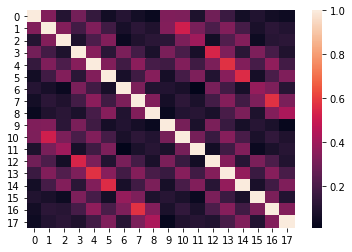

In [131]:
sns.heatmap(np.cov(res, rowvar = False))

In [132]:
%%time

np.random.seed(100)
n_rep = 5000
res = np.zeros((n_rep, d))
for i in range(n_rep):
    res[i, :] = ising_sampler(lf, dims, n_iter = 200)
    
ho_cov = np.cov(res, rowvar = False)
ho_cov

CPU times: user 55.8 s, sys: 384 ms, total: 56.2 s
Wall time: 58 s


In [133]:
orig_marg = emp_cov[0:d, 0:d]
print(np.max(np.abs(orig_marg - ho_cov)))
ko_marg = emp_cov[d:(2*d), d:(2*d)]
print(np.max(np.abs(ko_marg - ho_cov)))

ko_orig_cross = emp_cov[0:d, d:(2*d)] - ho_cov
np.fill_diagonal(ko_orig_cross, 0)
print(np.max(np.abs(ko_orig_cross)))

0.06426933386677353
0.0714613322664535
0.06872814562912598


In [134]:
ho_cov

array([[0.99989022, 0.31005497, 0.15210082, 0.34534651, 0.21078008,
        0.12200328, 0.1654923 , 0.11567241, 0.04789822],
       [0.31005497, 1.00019988, 0.31646489, 0.20004177, 0.3620801 ,
        0.19523857, 0.106018  , 0.15523217, 0.07042064],
       [0.15210082, 0.31646489, 1.00018404, 0.0900004 , 0.18556031,
        0.31006681, 0.05524305, 0.10761032, 0.11795799],
       [0.34534651, 0.20004177, 0.0900004 , 1.00018068, 0.36918936,
        0.15683665, 0.31409802, 0.20722913, 0.11595103],
       [0.21078008, 0.3620801 , 0.18556031, 0.36918936, 0.99983133,
        0.3492929 , 0.19379236, 0.36601944, 0.1809213 ],
       [0.12200328, 0.19523857, 0.31006681, 0.15683665, 0.3492929 ,
        1.0001986 , 0.09640968, 0.19604257, 0.30648098],
       [0.1654923 , 0.106018  , 0.05524305, 0.31409802, 0.19379236,
        0.09640968, 1.00013603, 0.32128666, 0.10295179],
       [0.11567241, 0.15523217, 0.10761032, 0.20722913, 0.36601944,
        0.19604257, 0.32128666, 1.0001922 , 0.32241856],


In [135]:
orig_marg

array([[1.00016403, 0.33364513, 0.10410002, 0.30328226, 0.14852571,
        0.05773395, 0.10804321, 0.06353111, 0.03395399],
       [0.33364513, 1.00018708, 0.33771506, 0.18084913, 0.32772314,
        0.17690882, 0.07522801, 0.12197544, 0.09158664],
       [0.10410002, 0.33771506, 1.00002577, 0.08957039, 0.20823045,
        0.33819836, 0.03755999, 0.09419836, 0.11813979],
       [0.30328226, 0.18084913, 0.08957039, 1.00018708, 0.34441128,
        0.12155087, 0.31845073, 0.1836857 , 0.08284825],
       [0.14852571, 0.32772314, 0.20823045, 0.34441128, 0.99994399,
        0.33214003, 0.17637768, 0.35628886, 0.19217924],
       [0.05773395, 0.17690882, 0.33819836, 0.12155087, 0.33214003,
        0.9997838 , 0.07354127, 0.17511246, 0.34304813],
       [0.10804321, 0.07522801, 0.03755999, 0.31845073, 0.17637768,
        0.07354127, 1.00018708, 0.3197129 , 0.09645097],
       [0.06353111, 0.12197544, 0.09419836, 0.1836857 , 0.35628886,
        0.17511246, 0.3197129 , 1.00001504, 0.33354703],


In [136]:
ko_marg

array([[0.99946005, 0.30961328, 0.08063949, 0.31535011, 0.15672254,
        0.07039232, 0.11027229, 0.08133851, 0.02700956],
       [0.30961328, 0.99922641, 0.3061998 , 0.15853155, 0.34234367,
        0.19601424, 0.0823035 , 0.13822669, 0.09339404],
       [0.08063949, 0.3061998 , 0.99975051, 0.05807946, 0.17635047,
        0.33244953, 0.0378026 , 0.08242352, 0.11306997],
       [0.31535011, 0.15853155, 0.05807946, 1.0001898 , 0.34088098,
        0.11762609, 0.31883433, 0.20557968, 0.09844273],
       [0.15672254, 0.34234367, 0.17635047, 0.34088098, 1.00018404,
        0.37367153, 0.16046889, 0.34414563, 0.19841088],
       [0.07039232, 0.19601424, 0.33244953, 0.11762609, 0.37367153,
        1.0001994 , 0.07882312, 0.17925121, 0.32805985],
       [0.11027229, 0.0823035 , 0.0378026 , 0.31883433, 0.16046889,
        0.07882312, 1.00011538, 0.32108758, 0.1012865 ],
       [0.08133851, 0.13822669, 0.08242352, 0.20557968, 0.34414563,
        0.17925121, 0.32108758, 0.99983133, 0.33540532],
